In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Trying fourier plotting

In [4]:
n = 1       # fourier degree
a = 2*n+1   
p = 0.5     # amplitude decay constant

In [5]:
def fourier(x, n=1, p=0.5, fi=0):
    '''
    return a fourier value for a given point for a certain degree n and phase fi

    Parameters
    ----------

    x : float
        point at which to evaluate the fourier series expansion
    n : float
        Degree of wavelet
    p : float
        amplitude decay exponent
    fi : float
        phase offset defining angle
    '''
    a = 2*n +1
    return (1/(np.float_power(a, p)))*np.sin(a*x + fi)

In [156]:
x = np.linspace(0, 2*np.pi, 100)


In [157]:
def combined_plotter(x, n=2, fi=0):
    foofig = plt.figure()
    ax = foofig.add_subplot(1,1,1)
    y = np.zeros_like(x)
    for n_n in range(n):
        y_n = fourier(x, n=n_n+1, fi=fi)
        y = np.add(y, y_n)
        #print('N = '+str(n_n))

    ax.plot(x, y)

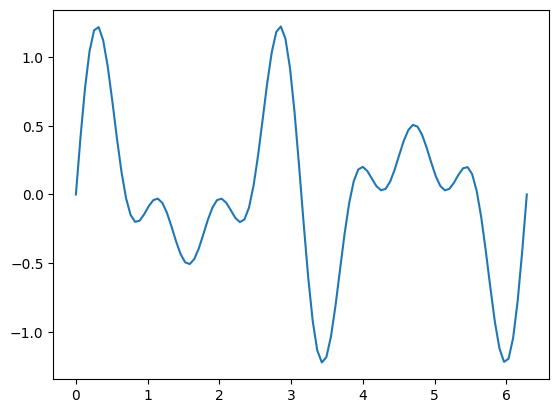

In [158]:
combined_plotter(x, n=3)

In [163]:
def disparate_plotter(x, n=2, fi=0):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for n in range(n):
        ax.plot(x, fourier(x, n=n+1, fi=fi))

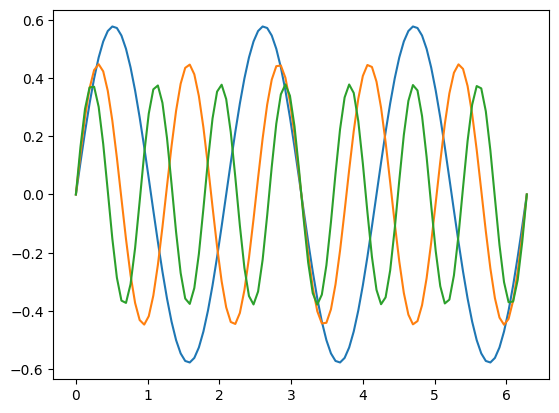

In [168]:
disparate_plotter(x, n=3)

In [170]:
import ipywidgets as widgets

x = np.linspace(0, 2*np.pi, 100)

# inputs
n_slider = widgets.IntSlider(description='Number of Curves', value=1, min=1, max=4)
fi_slider = widgets.FloatSlider(value=0, min = 0, max = np.pi/2, step = 0.05, description='fi')

# outputs

output_disparatePlots = widgets.Output()
output_combinedFourier = widgets.Output()

# update functions

def combinedEventHandler(obj):
    output_combinedFourier.clear_output()
    output_disparatePlots.clear_output()

    with output_disparatePlots:
        disparateFig = disparate_plotter(x, n=n_slider.value, fi=fi_slider.value)
        plt.show(disparateFig)

    with output_combinedFourier:
        comboFig = combined_plotter(x, n=n_slider.value, fi=fi_slider.value)
        plt.show(comboFig)


# update conditions

n_slider.observe(combinedEventHandler)
fi_slider.observe(combinedEventHandler)

# display 

input_widgets = widgets.HBox([n_slider, fi_slider], layout={'border': '1px solid black'})

output_tabs = widgets.Tab([output_disparatePlots, output_combinedFourier])
output_tabs.set_title(0, 'Individual Curves')
output_tabs.set_title(1, 'Combined Fourier')

dashboard = widgets.VBox([input_widgets, output_tabs])

display(dashboard)

#for n in np.arange(1,4):
#    plt.plot(x, fourier(x, n=n), lw=0.5, label='n='+str(n) )

#plt.legend()


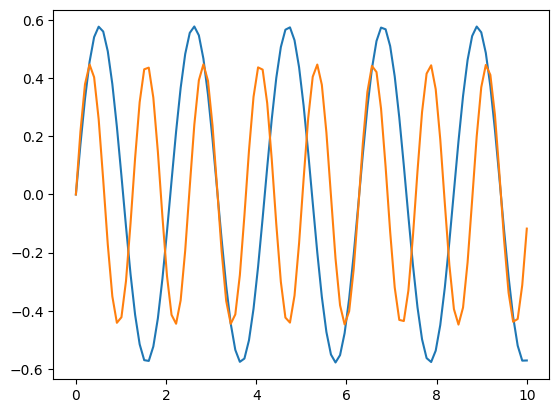

In [72]:
import matplotlib.lines as lines

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, fourier(x))
ax.plot(x, fourier(x, n=2))



plt.show()

In [64]:
import matplotlib.pyplot as plt

import matplotlib.lines as lines

fig = plt.figure()
fig.add_artist(lines.Line2D([0, 1], [0, 1]))
fig.add_artist(lines.Line2D([0, 1], [1, 0]))
plt.show()

<Figure size 640x480 with 0 Axes>